<a href="https://colab.research.google.com/github/WajeehGillani/learning-agents/blob/main/my_second_lang_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 10.6 MB/s eta 0:00:00


In [10]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [23]:
class AgentState(TypedDict):
  values: List[int]
  name: str
  result: str
  operation: str

In [24]:
def process_node(state: AgentState) -> AgentState:
  if(state['operation'] == '+'):
    state['result'] = f"Hi {state['name']} you result of Sum is: {sum(state['values'])}"
  else:
    state['result'] = f"Hi {state['name']} you result of Multiply is: {[x * x for x in state['values']]}"
  return state

In [25]:
graph = StateGraph(AgentState)

graph.add_node("process_node", process_node)
graph.set_entry_point("process_node")
graph.set_finish_point("process_node")

app = graph.compile()

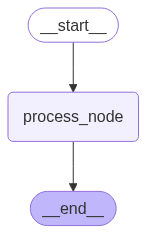

In [26]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [29]:
answer = app.invoke({"values":[1,2,3,4],"name":"Jack Sparrow","operation":"*"})
# answer = app.invoke({"values":[1,2,3,4],"name":"Jack Sparrow","operation":"+"})

In [30]:
print(answer)

{'values': [1, 2, 3, 4], 'name': 'Jack Sparrow', 'result': 'Hi Jack Sparrow you result of Multiply is: [1, 4, 9, 16]', 'operation': '*'}
